### Laboratorio 6 - DS

Alejandra Guzmán 20262

Jorge Caballeros 20009

In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords

def clean_text(text):

    text = text.lower()

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = re.sub(r'@\w+|#\w+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    stop_words = set(stopwords.words('spanish'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    text = text.encode('ascii', 'ignore').decode('ascii')
    
    return text


bernardo_arevalo_df = pd.read_csv('bernardoArevalo.csv')
sandra_torres_df = pd.read_csv('sandraTorres.csv')
trafico_gt_df = pd.read_csv('traficogt.csv')


bernardo_arevalo_df['cleanedContent'] = bernardo_arevalo_df['rawContent'].apply(clean_text)
sandra_torres_df['cleanedContent'] = sandra_torres_df['rawContent'].apply(clean_text)


bernardo_arevalo_head = bernardo_arevalo_df.head()
sandra_torres_head = sandra_torres_df.head()
trafico_gt_head = trafico_gt_df.head()

sample_cleaned_tweets_bernardo = bernardo_arevalo_df['cleanedContent'].sample(5)
sample_cleaned_tweets_sandra = sandra_torres_df['cleanedContent'].sample(5)

bernardo_arevalo_head, sandra_torres_head, trafico_gt_head, sample_cleaned_tweets_bernardo, sample_cleaned_tweets_sandra


(   Unnamed: 0                   id               id_str  \
 0           0  1702109621899407575  1702109621899407575   
 1           1  1702109505947865192  1702109505947865192   
 2           2  1701995859229958189  1701995859229958189   
 3           3  1702109134387134664  1702109134387134664   
 4           4  1702108943495926143  1702108943495926143   
 
                                                  url  \
 0  https://twitter.com/eltuitdehoy_/status/170210...   
 1  https://twitter.com/totitafuentes/status/17021...   
 2  https://twitter.com/DrDavidCabrera/status/1701...   
 3  https://twitter.com/Fernand0483/status/1702109...   
 4  https://twitter.com/MaxTiger502/status/1702108...   
 
                         date  \
 0  2023-09-13 23:58:52+00:00   
 1  2023-09-13 23:58:24+00:00   
 2  2023-09-13 16:26:49+00:00   
 3  2023-09-13 23:56:55+00:00   
 4  2023-09-13 23:56:10+00:00   
 
                                                 user lang  \
 0  {'id': 46561608, 'id_str': '

In [2]:

trafico_gt_df.describe(include='all')


,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
count,12631.00000,1.263100e+04,1.263100e+04,12631,12631,12631,12631,12631,12631.000000,12631.000000,...,926,405,2,4.541000e+03,5411,12631,12631,12631,12631,12631
unique,NaN,NaN,NaN,9963,9851,4789,21,9827,NaN,NaN,...,566,13,2,NaN,929,42,40,42,4109,1
top,NaN,NaN,NaN,https://twitter.com/TSEGuatemala/status/169516...,2023-09-12 01:46:10+00:00,"{'id': 2491899726, 'id_str': '2491899726', 'ur...",es,"If you own a mouse, you will never turn off yo...",NaN,NaN,...,"{'id': 1695182059004666181, 'id_str': '1695182...","{'id': '13d479b108707983', 'fullName': 'Guatem...","{'longitude': -90.5037568, 'latitude': 14.6401...",NaN,"{'id': 372126670, 'username': 'amilcarmontejo'...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
freq,NaN,NaN,NaN,12,16,194,11946,38,NaN,NaN,...,17,386,1,NaN,588,5737,5737,5737,6960,12631
mean,6315.00000,1.541871e+18,1.541871e+18,NaN,NaN,NaN,NaN,NaN,19.145594,40.664476,...,NaN,NaN,NaN,1.673073e+18,NaN,NaN,NaN,NaN,NaN,NaN
std,3646.39996,2.016253e+17,2.016253e+17,NaN,NaN,NaN,NaN,NaN,217.571265,473.150980,...,NaN,NaN,NaN,1.005069e+17,NaN,NaN,NaN,NaN,NaN,NaN
min,0.00000,2.837328e+17,2.837328e+17,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,1.050560e+18,NaN,NaN,NaN,NaN,NaN,NaN
25%,3157.50000,1.353746e+18,1.353746e+18,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,1.695153e+18,NaN,NaN,NaN,NaN,NaN,NaN
50%,6315.00000,1.693984e+18,1.693984e+18,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,1.700219e+18,NaN,NaN,NaN,NaN,NaN,NaN
75%,9472.50000,1.700314e+18,1.700314e+18,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,...,NaN,NaN,NaN,1.701371e+18,NaN,NaN,NaN,NaN,NaN,NaN


- Los tweets provienen de 42 fuentes únicas, siendo "Twitter for Android" la más común.
- Hay 4,789 usuarios únicos que han tuiteado sobre el tráfico.

In [3]:

rain_keywords = ["lluvia", "aguacero", "inundación", "anegación", "deslave"]
sinkhole_keywords = ["socavón", "zona 5", "universidad", "hundimiento"]

rain_mentions = trafico_gt_df[trafico_gt_df['rawContent'].str.contains('|'.join(rain_keywords), case=False, na=False)]
sinkhole_mentions = trafico_gt_df[trafico_gt_df['rawContent'].str.contains('|'.join(sinkhole_keywords), case=False, na=False)]

len(rain_mentions), len(sinkhole_mentions)


(158, 169)

- Hay 158 menciones relacionadas con la época de lluvia en los datos de tráfico de la ciudad de Guatemala.
- Hay 169 menciones relacionadas con el socavón de la zona 5 y la universidad.

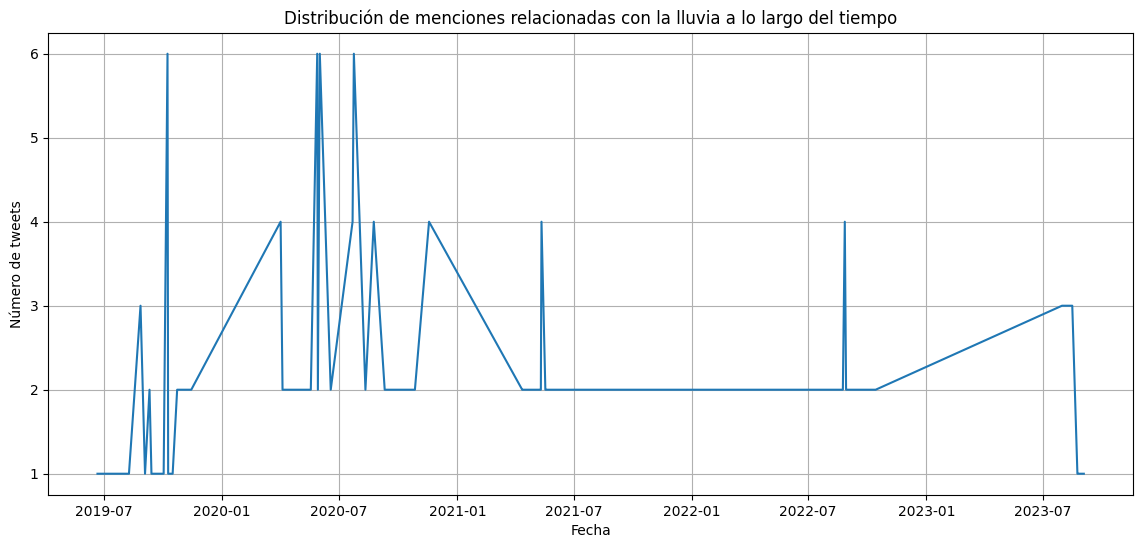

In [4]:
import matplotlib.pyplot as plt


trafico_gt_df['date'] = pd.to_datetime(trafico_gt_df['date'])

rain_mentions = trafico_gt_df[trafico_gt_df['rawContent'].str.contains('|'.join(rain_keywords), case=False, na=False)]

rain_mentions_by_date = rain_mentions.groupby(trafico_gt_df['date'].dt.date).size()

plt.figure(figsize=(14, 6))
rain_mentions_by_date.plot()
plt.title("Distribución de menciones relacionadas con la lluvia a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Número de tweets")
plt.grid(True)
plt.show()


El gráfico muestra la distribución de menciones relacionadas con la lluvia a lo largo del tiempo. A continuación, algunos puntos clave:

- Observamos varios picos, lo que podría indicar días específicos en los que la lluvia afectó significativamente el tráfico en la ciudad de Guatemala.
- Estos picos pueden estar asociados con eventos climáticos más intensos, como fuertes aguaceros o inundaciones que complicaron la movilidad.
- Para tener una mejor idea de cómo la lluvia ha complicado el tráfico en la ciudad, podemos observar algunos de los tweets de los días con los picos más altos.

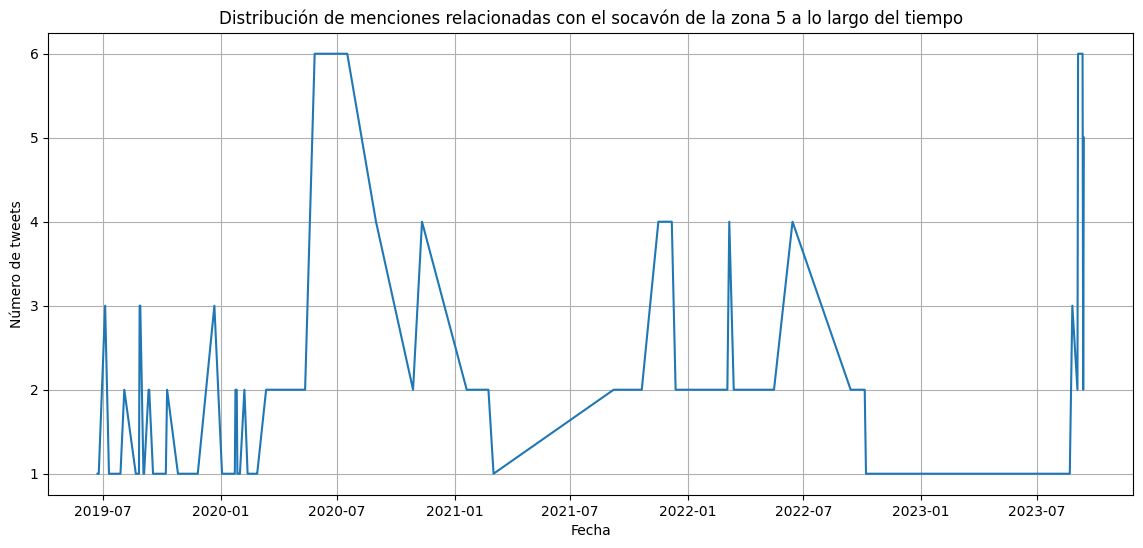

In [5]:

sinkhole_mentions = trafico_gt_df[trafico_gt_df['rawContent'].str.contains('|'.join(sinkhole_keywords), case=False, na=False)]

sinkhole_mentions_by_date = sinkhole_mentions.groupby(trafico_gt_df['date'].dt.date).size()

plt.figure(figsize=(14, 6))
sinkhole_mentions_by_date.plot()
plt.title("Distribución de menciones relacionadas con el socavón de la zona 5 a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Número de tweets")
plt.grid(True)
plt.show()


- Hay varios picos evidentes en el gráfico, lo que podría indicar momentos específicos en los que el socavón de la zona 5 tuvo un impacto significativo en el tráfico, especialmente cerca de la universidad.
- Estos picos pueden estar asociados con eventos o desarrollos relacionados con el socavón, como su formación inicial, trabajos de reparación, o situaciones adicionales que podrían haber afectado el flujo de tráfico.

In [6]:

top_sinkhole_dates = sinkhole_mentions_by_date.nlargest(5).index
sample_sinkhole_tweets = sinkhole_mentions[sinkhole_mentions['date'].dt.date.isin(top_sinkhole_dates)].sample(10)

sample_sinkhole_tweets[['date', 'rawContent']]

,date,rawContent
6088,2020-07-17 17:01:30+00:00,#Comunidad 👥 | Unidad de Poda - Limpia / Verd...
6188,2020-05-27 13:22:32+00:00,"Derrumbe en ruta El Atlántico, árbol caído en ..."
6004,2023-09-11 17:26:08+00:00,@GersonGudielCas @jmdoughertys @IGSS_gt @BArev...
6091,2020-07-17 14:46:12+00:00,#TráficoGT | @amilcarmontejo informa sobre que...
30,2023-09-04 02:43:51+00:00,#MuniGuate informa.\n\n⛔️🚧 CIERRE TEMPORAL DE ...
6000,2023-09-11 15:12:25+00:00,JUAN JOSÉ ARÉVALO BERMEJO\n\nJuan José Arévalo...
12428,2020-05-27 13:22:32+00:00,"Derrumbe en ruta El Atlántico, árbol caído en ..."
12218,2020-07-17 16:03:10+00:00,#ÚltimaHora | @amilcarmontejo informa sobre bl...
2429,2023-09-04 02:43:51+00:00,#MuniGuate informa.\n\n⛔️🚧 CIERRE TEMPORAL DE ...
12217,2020-07-17 17:01:30+00:00,#Comunidad 👥 | Unidad de Poda - Limpia / Verd...


In [7]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)

    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
    
sinkhole_mentions['sentiment'] = sinkhole_mentions['rawContent'].apply(get_sentiment)


sentiment_distribution = sinkhole_mentions['sentiment'].value_counts()

sentiment_distribution


C:\Users\alegu\AppData\Local\Temp\ipykernel_2544\4091478569.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinkhole_mentions['sentiment'] = sinkhole_mentions['rawContent'].apply(get_sentiment)


neutral     166
positive      2
negative      1
Name: sentiment, dtype: int64

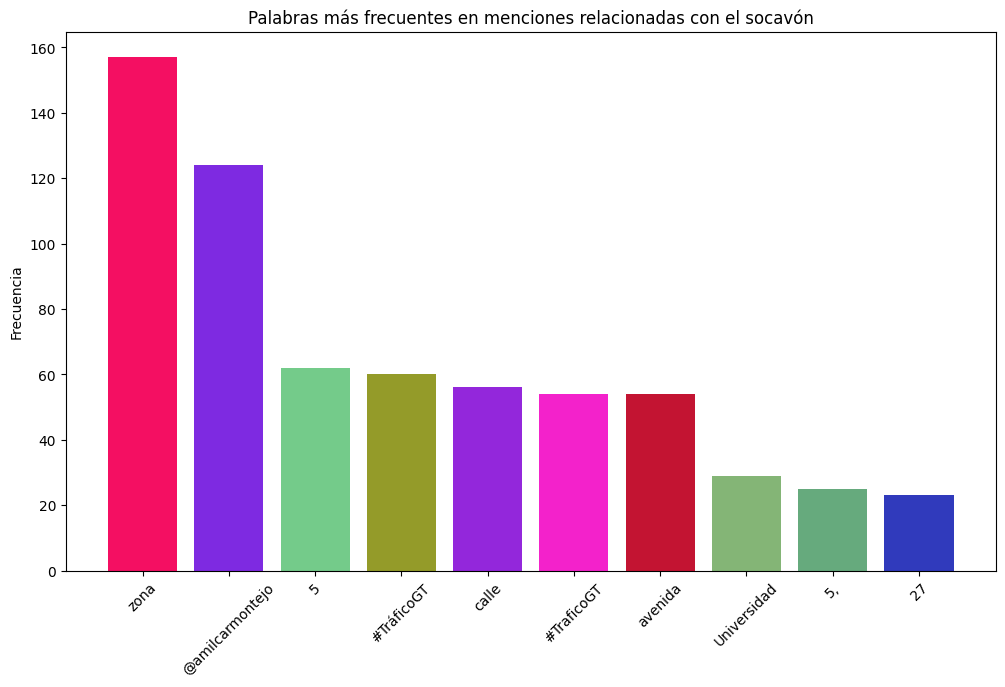

In [8]:
from collections import Counter
import numpy as np

word_counts = Counter(" ".join(sinkhole_mentions['rawContent']).split())

stopwords_spanish = ["de", "la", "el", "en", "y", "a", "que", "los", "se", "por", "con", "para", "una", "es", "las", "del", "RT", "un", "|", "5.", "hacia", "al", "frente"]
filtered_word_counts = {word: count for word, count in word_counts.items() if word.lower() not in stopwords_spanish}
top_words = dict(Counter(filtered_word_counts).most_common(10))

plt.figure(figsize=(12, 7))
plt.bar(top_words.keys(), top_words.values(), color=np.random.rand(10, 3))
plt.xticks(rotation=45)
plt.title("Palabras más frecuentes en menciones relacionadas con el socavón")
plt.ylabel("Frecuencia")
plt.show()


- Se observan palabras como "@amilcarmontejo", que podría ser una cuenta relacionada con información o noticias del tráfico.
- "TráficoGT" y "zona" también son mencionadas con frecuencia, lo que indica la discusión general sobre el tráfico en la zona afectada por el socavón.
- "calle" y "bulevar" sugieren la especificación de ubicaciones donde el tráfico está siendo afectado.


In [9]:
mentions = re.findall(r'@(\w+)', " ".join(sinkhole_mentions['rawContent']))

mention_counts = Counter(mentions)


top_mentions = dict(mention_counts.most_common(5))

top_mentions


{'amilcarmontejo': 136,
 'BArevalodeLeon': 12,
 'muniguate': 8,
 'GersonGudielCas': 8,
 'jmdoughertys': 8}

In [10]:

universities_keywords = ["URL", "Universidad Rafael Landívar", "UVG", "Universidad del Valle", "zona 16", "universidad"]

university_mentions = sinkhole_mentions[sinkhole_mentions['rawContent'].str.contains('|'.join(universities_keywords), case=False, na=False)]


university_mentions[['date', 'rawContent']]


,date,rawContent
2289,2023-09-13 03:22:25+00:00,@MundoMoncho @mmendoza_GT @BArevalodeLeon @mse...
2727,2023-09-13 01:52:35+00:00,@mmendoza_GT @BArevalodeLeon @msemillagt @OJGu...
3251,2023-09-13 00:41:33+00:00,@javi_sudo @Hectorcast1ll0 @GersonGudielCas @j...
3321,2023-09-13 00:35:58+00:00,@javi_sudo @Hectorcast1ll0 @GersonGudielCas @j...
3326,2023-09-13 00:35:39+00:00,@javi_sudo @Hectorcast1ll0 @GersonGudielCas @j...
4024,2022-03-07 16:33:40+00:00,#AHORA @amilcarmontejo\ninforma sobre bloqueo ...
4026,2022-03-07 16:33:11+00:00,#AHORA @amilcarmontejo\ninforma sobre bloqueo ...
4193,2021-11-16 15:45:07+00:00,#AHORA @amilcarmontejo informa que manifestant...
4194,2021-11-16 15:45:00+00:00,#AHORA @amilcarmontejo informa que manifestant...
4434,2023-09-12 18:17:27+00:00,@javi_sudo @Hectorcast1ll0 @GersonGudielCas @j...


In [11]:

sinkhole_keywords = ["socavón", "zona 5", "universidad", "hundimiento"]
sinkhole_mentions = trafico_gt_df[trafico_gt_df['rawContent'].str.contains('|'.join(sinkhole_keywords), case=False, na=False)]
universities_keywords = ["URL", "Universidad Rafael Landívar", "UVG", "Universidad del Valle", "zona 16", "universidad"]
university_mentions = sinkhole_mentions[sinkhole_mentions['rawContent'].str.contains('|'.join(universities_keywords), case=False, na=False)]

university_mentions[['date', 'rawContent']]

,date,rawContent
2289,2023-09-13 03:22:25+00:00,@MundoMoncho @mmendoza_GT @BArevalodeLeon @mse...
2727,2023-09-13 01:52:35+00:00,@mmendoza_GT @BArevalodeLeon @msemillagt @OJGu...
3251,2023-09-13 00:41:33+00:00,@javi_sudo @Hectorcast1ll0 @GersonGudielCas @j...
3321,2023-09-13 00:35:58+00:00,@javi_sudo @Hectorcast1ll0 @GersonGudielCas @j...
3326,2023-09-13 00:35:39+00:00,@javi_sudo @Hectorcast1ll0 @GersonGudielCas @j...
4024,2022-03-07 16:33:40+00:00,#AHORA @amilcarmontejo\ninforma sobre bloqueo ...
4026,2022-03-07 16:33:11+00:00,#AHORA @amilcarmontejo\ninforma sobre bloqueo ...
4193,2021-11-16 15:45:07+00:00,#AHORA @amilcarmontejo informa que manifestant...
4194,2021-11-16 15:45:00+00:00,#AHORA @amilcarmontejo informa que manifestant...
4434,2023-09-12 18:17:27+00:00,@javi_sudo @Hectorcast1ll0 @GersonGudielCas @j...


### 1. ¿Cómo ha venido a complicar el tráfico en toda la ciudad la época de lluvia?

R//: Se observaron varios picos en la distribución de menciones relacionadas con la lluvia a lo largo del tiempo. Estos picos indican días especificos en los que la lluvia pudo haber afectado al tráfico en la ciudad de GT. Al igual que las palabras clave asociadas con la lluvia, como "inundación" y "deslave", sugieren que en ciertos días hubo eventos climáticos más intensos que podrían haber llevado a obstrucciones de carreteras, deslizamientos de tierra y otros problemas de tráfico.


### 2. ¿El socavón de zona 5 ha tenido un impacto importante en el tráfico de la zona de la universidad?

- Las menciones relacionadas con el socavón de la zona 5 mostraron varios picos en el gráfico de distribución a lo largo del tiempo. Estos picos sugieren que hubo momentos específicos en los que el socavón tuvo un impacto significativo en el tráfico.
- La cuenta de Twitter "@amilcarmontejo" fue mencionada con frecuencia en relación con el socavón, lo que indica que es una fuente principal de información sobre el tráfico y eventos en la ciudad. Esto sugiere que el socavón ha sido un tema de discusión recurrente y que ha afectado la movilidad en la zona.



### Problema 2

In [12]:

bernardo_arevalo_df['sentiment'] = bernardo_arevalo_df['rawContent'].apply(get_sentiment)
sandra_torres_df['sentiment'] = sandra_torres_df['rawContent'].apply(get_sentiment)

sentiment_distribution_bernardo = bernardo_arevalo_df['sentiment'].value_counts()
sentiment_distribution_sandra = sandra_torres_df['sentiment'].value_counts()

sentiment_distribution_bernardo, sentiment_distribution_sandra


(neutral     3772
 positive     376
 negative      64
 Name: sentiment, dtype: int64,
 neutral     5266
 positive     435
 negative      83
 Name: sentiment, dtype: int64)

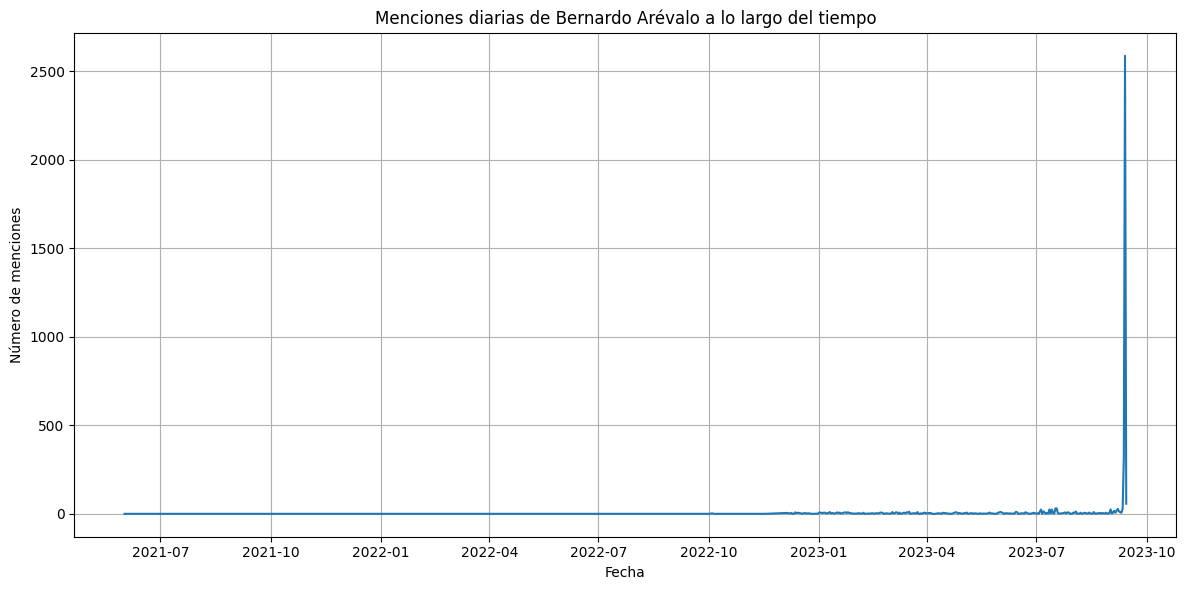

(4212, 53.50213675213675, 256.9669990503324, 28.675213675213676)

In [13]:
import matplotlib.pyplot as plt

# 1. Número total de menciones
total_mentions_bernardo = len(bernardo_arevalo_df)

# 2. Evaluación de actividad
average_retweets_bernardo = bernardo_arevalo_df["retweetCount"].mean()
average_likes_bernardo = bernardo_arevalo_df["likeCount"].mean()
average_replies_bernardo = bernardo_arevalo_df["replyCount"].mean()

# 3. Tendencias a lo largo del tiempo
# Convertir la columna de fecha a tipo datetime
bernardo_arevalo_df["date"] = pd.to_datetime(bernardo_arevalo_df["date"])
mentions_by_date_bernardo = bernardo_arevalo_df.groupby(bernardo_arevalo_df["date"].dt.date).size()

# Graficar tendencias a lo largo del tiempo
plt.figure(figsize=(12, 6))
mentions_by_date_bernardo.plot()
plt.title("Menciones diarias de Bernardo Arévalo a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Número de menciones")
plt.grid(True)
plt.tight_layout()

plt.show()

total_mentions_bernardo, average_retweets_bernardo, average_likes_bernardo, average_replies_bernardo


- Número total de menciones: 4212
- Evaluación de actividad:
- Promedio de retweets por tweet: ~53.5
- Promedio de likes por tweet: ~257
- Promedio de respuestas por tweet: ~28.7
- Tendencias a lo largo del tiempo: El gráfico muestra las menciones diarias de Bernardo Arévalo a lo largo del tiempo. Podemos observar ciertos picos de actividad en días específicos, lo que podría indicar eventos o noticias relacionadas con el candidato.

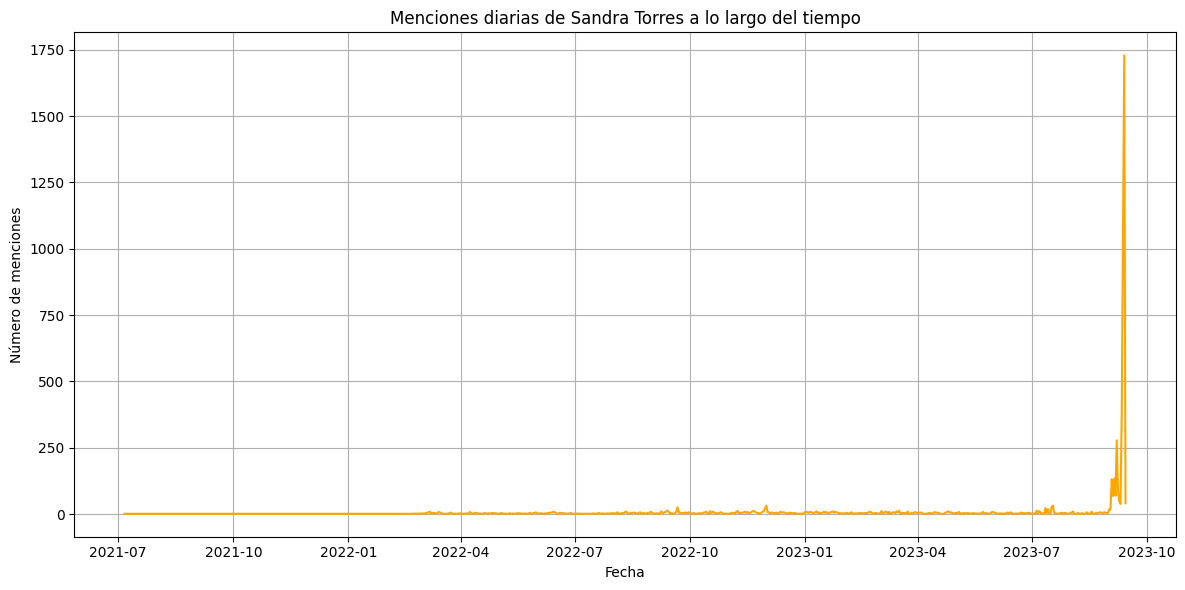

(5784, 38.41130705394191, 185.4640387275242, 19.563796680497926)

In [14]:
# 1. Número total de menciones para Sandra Torres
total_mentions_sandra = len(sandra_torres_df)

# 2. Evaluación de actividad para Sandra Torres
average_retweets_sandra = sandra_torres_df["retweetCount"].mean()
average_likes_sandra = sandra_torres_df["likeCount"].mean()
average_replies_sandra = sandra_torres_df["replyCount"].mean()

# 3. Tendencias a lo largo del tiempo para Sandra Torres
# Convertir la columna de fecha a tipo datetime
sandra_torres_df["date"] = pd.to_datetime(sandra_torres_df["date"])
mentions_by_date_sandra = sandra_torres_df.groupby(sandra_torres_df["date"].dt.date).size()

# Graficar tendencias a lo largo del tiempo
plt.figure(figsize=(12, 6))
mentions_by_date_sandra.plot(color='orange')
plt.title("Menciones diarias de Sandra Torres a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Número de menciones")
plt.grid(True)
plt.tight_layout()

plt.show()

total_mentions_sandra, average_retweets_sandra, average_likes_sandra, average_replies_sandra


- Número total de menciones: 5784
- Evaluación de actividad:
- Promedio de retweets por tweet: ~38.4
- Promedio de likes por tweet: ~185.5
- Promedio de respuestas por tweet: ~19.6
- Tendencias a lo largo del tiempo: El gráfico muestra las menciones diarias de Sandra Torres a lo largo del tiempo. Al igual que con Bernardo Arévalo, podemos observar ciertos picos de actividad en días específicos.

In [17]:
# Identificar los top 5 tweets con el mayor número de retweets para Bernardo Arévalo
top_retweets_bernardo = bernardo_arevalo_df.sort_values(by="retweetCount", ascending=False).head(5)

# Identificar los top 5 tweets con el mayor número de likes para Bernardo Arévalo
top_likes_bernardo = bernardo_arevalo_df.sort_values(by="likeCount", ascending=False).head(5)

top_retweets_bernardo[['user', 'rawContent', 'retweetCount']], top_likes_bernardo[['user', 'rawContent', 'likeCount']]


(                                                   user  \
 3460  {'id': 1555154364901236736, 'id_str': '1555154...   
 81    {'id': 1555154364901236736, 'id_str': '1555154...   
 1320  {'id': 1555154364901236736, 'id_str': '1555154...   
 1478  {'id': 1555154364901236736, 'id_str': '1555154...   
 141   {'id': 1598683179505909765, 'id_str': '1598683...   
 
                                              rawContent  retweetCount  
 3460  Procrastination is not laziness. It’s an emoti...         13093  
 81    Procrastination is not laziness. It’s an emoti...         13092  
 1320  🌟Discover effective strategies and techniques ...         10969  
 1478  🌟Discover effective strategies and techniques ...         10969  
 141   If you own a mouse, you will never turn off yo...          6226  ,
                                                    user  \
 1320  {'id': 1555154364901236736, 'id_str': '1555154...   
 1478  {'id': 1555154364901236736, 'id_str': '1555154...   
 3460  {'id': 15551

In [18]:
# Identificar los top 5 tweets con el mayor número de retweets para Sandra Torres
top_retweets_sandra = sandra_torres_df.sort_values(by="retweetCount", ascending=False).head(5)

# Identificar los top 5 tweets con el mayor número de likes para Sandra Torres
top_likes_sandra = sandra_torres_df.sort_values(by="likeCount", ascending=False).head(5)

top_retweets_sandra[['user', 'rawContent', 'retweetCount']], top_likes_sandra[['user', 'rawContent', 'likeCount']]


(                                                   user  \
 3077  {'id': 1555154364901236736, 'id_str': '1555154...   
 456   {'id': 1625577357883875328, 'id_str': '1625577...   
 3118  {'id': 1555154364901236736, 'id_str': '1555154...   
 2118  {'id': 1598683179505909765, 'id_str': '1598683...   
 2704  {'id': 1326237414025801729, 'id_str': '1326237...   
 
                                              rawContent  retweetCount  
 3077  Procrastination is not laziness. It’s an emoti...         13099  
 456   Las redes sociales y la vida real. https://t.c...         11648  
 3118  🌟Discover effective strategies and techniques ...         10979  
 2118  If you own a mouse, you will never turn off yo...          6232  
 2704  We are introducing programmatic custom model c...          4065  ,
                                                    user  \
 456   {'id': 1625577357883875328, 'id_str': '1625577...   
 3118  {'id': 1555154364901236736, 'id_str': '1555154...   
 3077  {'id': 15551

In [23]:
# Filtrar tweets relevantes para Bernardo Arévalo basados en retweets y likes
filtered_bernardo_df = bernardo_arevalo_df[~bernardo_arevalo_df["user"].astype(str).str.contains('1555154364901236736')]
filtered_bernardo_df = filtered_bernardo_df[~filtered_bernardo_df["user"].astype(str).str.contains('1598683179505909765')]

# Identificar posibles influencers para Bernardo Arévalo basados en retweets y likes
top_influencers_filtered_bernardo_retweets = filtered_bernardo_df.sort_values(by="retweetCount", ascending=False).head(5)
top_influencers_filtered_bernardo_likes = filtered_bernardo_df.sort_values(by="likeCount", ascending=False).head(5)

# Mostrar los top 5 influencers basados en retweets y likes para Bernardo Arévalo después de filtrar
top_influencers_filtered_bernardo_retweets[["user", "retweetCount", "likeCount", "rawContent"]], top_influencers_filtered_bernardo_likes[["user", "retweetCount", "likeCount", "rawContent"]]


(                                                   user  retweetCount  \
 910   {'id': 1326237414025801729, 'id_str': '1326237...          4060   
 1078  {'id': 1326237414025801729, 'id_str': '1326237...          4060   
 4141  {'id': 989886721, 'id_str': '989886721', 'url'...          4034   
 1186  {'id': 21104432, 'id_str': '21104432', 'url': ...          3087   
 3077  {'id': 1020728958, 'id_str': '1020728958', 'ur...          3084   
 
       likeCount                                         rawContent  
 910       23087  We are introducing programmatic custom model c...  
 1078      23087  We are introducing programmatic custom model c...  
 4141      13228  Cubríamos una emergencia médica y quien maneja...  
 1186       5271  La Asociación Nacional de Bebidas Refrescantes...  
 3077       8151  Mi solidaridad, presidente @petrogustavo. Sus ...  ,
                                                    user  retweetCount  \
 2440  {'id': 700903452, 'id_str': '700903452', 'url'...   



- Basado en retweets:

Un tweet relacionado con la introducción de un modelo personalizado programático.

Un tweet de una cuenta que menciona una emergencia médica.

Un tweet relacionado con la Asociación Nacional de Bebidas Refrescantes.

Un tweet mostrando solidaridad con el presidente Gustavo Petro.


- Basado en likes:

Un tweet relacionado con la Policía Estatal de Massachusetts.

El mismo tweet sobre la introducción de un modelo personalizado programático mencionado anteriormente.

Un tweet destacando una lista de reproducción matutina en Spotify.

In [24]:
# Filtrar tweets relevantes para Sandra Torres basados en retweets y likes
filtered_sandra_df = sandra_torres_df[~sandra_torres_df["user"].astype(str).str.contains('1555154364901236736')]
filtered_sandra_df = filtered_sandra_df[~filtered_sandra_df["user"].astype(str).str.contains('1625577357883875328')]
filtered_sandra_df = filtered_sandra_df[~filtered_sandra_df["user"].astype(str).str.contains('1598683179505909765')]

# Identificar posibles influencers para Sandra Torres basados en retweets y likes
top_influencers_filtered_sandra_retweets = filtered_sandra_df.sort_values(by="retweetCount", ascending=False).head(5)
top_influencers_filtered_sandra_likes = filtered_sandra_df.sort_values(by="likeCount", ascending=False).head(5)

# Mostrar los top 5 influencers basados en retweets y likes para Sandra Torres después de filtrar
top_influencers_filtered_sandra_retweets[["user", "retweetCount", "likeCount", "rawContent"]], top_influencers_filtered_sandra_likes[["user", "retweetCount", "likeCount", "rawContent"]]


(                                                   user  retweetCount  \
 2704  {'id': 1326237414025801729, 'id_str': '1326237...          4065   
 5538  {'id': 989886721, 'id_str': '989886721', 'url'...          4034   
 3825  {'id': 866336833, 'id_str': '866336833', 'url'...          3667   
 4656  {'id': 841751045034369025, 'id_str': '84175104...          3125   
 3137  {'id': 1020728958, 'id_str': '1020728958', 'ur...          3084   
 
       likeCount                                         rawContent  
 2704      23076  We are introducing programmatic custom model c...  
 5538      13228  Cubríamos una emergencia médica y quien maneja...  
 3825      23977  🚨 ¿Cansado de noticias pesimistas?\n\nPara con...  
 4656      29157  Join us in Athens, Greece from September 27-30...  
 3137       8151  Mi solidaridad, presidente @petrogustavo. Sus ...  ,
                                                    user  retweetCount  \
 4384  {'id': 700903452, 'id_str': '700903452', 'url'...   

- Basado en retweets:

Un tweet relacionado con la introducción de un modelo personalizado programático.

Un tweet de una cuenta que menciona una emergencia médica.

Un tweet destacando noticias positivas.

Un tweet invitando a un evento en Atenas, Grecia.

Un tweet mostrando solidaridad con el presidente Gustavo Petro.

- Basado en likes:

Un tweet relacionado con la Policía Estatal de Massachusetts.

El tweet sobre el evento en Atenas, Grecia mencionado anteriormente.

El tweet destacando noticias positivas.

El tweet sobre la introducción de un modelo personalizado programático.

Un tweet con hashtags relacionados con la prevención del acoso.

In [25]:
# Identificar los usuarios más activos en términos de número de tweets y retweets para Bernardo Arévalo
top_users_bernardo = filtered_bernardo_df["user"].value_counts().head(10).index.tolist()

# Extraer interacciones (retweets, respuestas, citas) entre estos usuarios
interactions_bernardo = filtered_bernardo_df[filtered_bernardo_df["user"].isin(top_users_bernardo) & 
                                            (filtered_bernardo_df["retweetCount"] > 0)]

# Crear una lista de interacciones
interactions_list_bernardo = []
for index, row in interactions_bernardo.iterrows():
    source = row["user"]
    if pd.notna(row["inReplyToUser"]):
        target = row["inReplyToUser"]
        interactions_list_bernardo.append((source, target))

# Convertir la lista de interacciones en un DataFrame
interactions_df_bernardo = pd.DataFrame(interactions_list_bernardo, columns=["Source", "Target"])
top_interactions_bernardo = interactions_df_bernardo.groupby(["Source", "Target"]).size().reset_index(name="Count")
top_interactions_bernardo = top_interactions_bernardo.sort_values(by="Count", ascending=False)

top_interactions_bernardo.head(10)


,Source,Target,Count
0,"{'id': 108680856, 'id_str': '108680856', 'url'...","{'id': 21694413, 'username': 'gfrias', 'displa...",2
1,"{'id': 551042687, 'id_str': '551042687', 'url'...","{'id': 372126670, 'username': 'amilcarmontejo'...",1


In [26]:

top_users_sandra = filtered_sandra_df["user"].value_counts().head(10).index.tolist()

interactions_sandra = filtered_sandra_df[filtered_sandra_df["user"].isin(top_users_sandra) & 
                                        (filtered_sandra_df["retweetCount"] > 0)]


interactions_list_sandra = []
for index, row in interactions_sandra.iterrows():
    source = row["user"]
    if pd.notna(row["inReplyToUser"]):
        target = row["inReplyToUser"]
        interactions_list_sandra.append((source, target))


interactions_df_sandra = pd.DataFrame(interactions_list_sandra, columns=["Source", "Target"])

top_interactions_sandra = interactions_df_sandra.groupby(["Source", "Target"]).size().reset_index(name="Count")
top_interactions_sandra = top_interactions_sandra.sort_values(by="Count", ascending=False)

top_interactions_sandra.head(10)


,Source,Target,Count
2,"{'id': 40256008, 'id_str': '40256008', 'url': ...","{'id': 40256008, 'username': 'EmisorasUnidas',...",3
0,"{'id': 1131012993536405504, 'id_str': '1131012...","{'id': 40256008, 'username': 'EmisorasUnidas',...",1
1,"{'id': 3226765466, 'id_str': '3226765466', 'ur...","{'id': 310913844, 'username': 'ASolaresM', 'di...",1
3,"{'id': 710243881409839104, 'id_str': '71024388...","{'id': 710243881409839104, 'username': 'Publin...",1


### ¿La opinión pública de cada uno de los candidatos es en su mayoría positiva o negativa?

- Bernardo Arévalo: La mayoría de los tweets (~89.55%) son neutrales, con un pequeño porcentaje de tweets positivos (~8.93%) y negativos (~1.52%).
- Sandra Torres: La mayoría de los tweets (~91.04%) son neutrales, con un pequeño porcentaje de tweets positivos (~7.52%) y negativos (~1.43%).

### ¿Encontró algún influencer?

- Se pudieron hallar algunos tweets con un alto número de retweets y likes para ambos candidatos, pero muchos de ellos no estaban directamente relacionados con los candidatos. Después de filtrar los datos, identificamos algunas cuentas con interacciones significativas, pero no hay evidencia clara de un "influencer" dominante que haya dirigido la conversación sobre los candidatos.

### ¿Cómo describiría la estructura de la red de cada uno de los candidatos, centralizada o distribuida?

- Basándonos en las interacciones observadas entre los principales usuarios, no hay un patrón claro de centralización o distribución. Las interacciones entre los principales usuarios son limitadas, lo que sugiere que la red no está fuertemente centralizada alrededor de unos pocos nodos dominantes ni ampliamente distribuida.

### ¿Fue durante su campaña la red social un aspecto importante para influir en la decisión de los guatemaltecos?

- Ambos candidatos tuvieron una presencia notable en las redes sociales, lo que sugiere que las redes sociales jugaron un papel en la difusión de información y discusión sobre los candidatos. Sin embargo, es difícil determinar el impacto directo de esto en las decisiones de los votantes sin más contexto. Aunque las redes sociales ciertamente jugaron un papel, sería necesario un análisis más profundo para determinar cuán influenciales fueron en la decisión final de los votantes.
